# Analyse des corrélations

## Importations

In [18]:
# Importations & définition des variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import plotly.graph_objects as go
import matplotlib

## Importations des données

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Chargement des données
fichier = "iodaa_2025_fichier_test.xlsx"
data = pd.read_excel(fichier)

# Définition cohérente des variables de composition (quantitatives) 
vars_expl = [
    "MS % brut", "PB % brut", "CB % brut", "MGR % brut", "MM % brut",
    "NDF % brut", "ADF % brut", "Lignine % brut", "Amidon % brut", "Sucres % brut"
    ]

# Définition cohérente des variables cibles (énergétiques et nutritionnelles)
vars_cibles = [
    "EM porc croissance (kcal) kcal/kg brut",
    "ED porc croissance (kcal) kcal/kg brut",
    "EN porc croissance (kcal) kcal/kg brut",
    "EMAn coq (kcal) kcal/kg brut",
    "EMAn poulet (kcal) kcal/kg brut",
    "UFL 2018 par kg brut",
    "PDI 2018 g/kg brut",
    "BalProRu 2018 g/kg brut"
    ]

# Définition cohérente des variables qualitatives
vars_qual = ["Classe", "Nom"]

# Conversion des variables de composition et énergétiques en numérique
for col in vars_expl + vars_cibles:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

# Dictionnaire de noms réels -> noms simplifiés pour affichage
noms_simplifies = {
    "MS % brut": "MS",
    "PB % brut": "PB",
    "CB % brut": "CB",
    "MGR % brut": "MGR",
    "MM % brut": "MM",
    "NDF % brut": "NDF",
    "ADF % brut": "ADF",
    "Lignine % brut": "Lignine",
    "Amidon % brut": "Amidon",
    "Sucres % brut": "Sucres",
    "EB (kcal) kcal/kg brut": "EB",
    "ED porc croissance (kcal) kcal/kg brut": "ED porc",
    "EM porc croissance (kcal) kcal/kg brut": "EM porc",
    "EN porc croissance (kcal) kcal/kg brut": "EN porc",
    "EMAn coq (kcal) kcal/kg brut": "EMAn coq",
    "EMAn poulet (kcal) kcal/kg brut": "EMAn poulet",
    "UFL 2018 par kg brut": "UFL",
    "PDI 2018 g/kg brut": "PDI",
    "BalProRu 2018 g/kg brut": "BalProRu"
}

In [4]:
# Aperçu des données
display(data.head())
print(f"Nombre de variables : {data.shape[1]}")
print(f"Nombre d'observations : {data.shape[0]}")
print(f"Nombre de valeurs manquantes : {data.isnull().sum().sum()}")

,Classe,Nom,MS % brut,PB % brut,CB % brut,MGR % brut,MM % brut,NDF % brut,ADF % brut,Lignine % brut,...,Sucres % brut,EB (kcal) kcal/kg brut,ED porc croissance (kcal) kcal/kg brut,EM porc croissance (kcal) kcal/kg brut,EN porc croissance (kcal) kcal/kg brut,EMAn coq (kcal) kcal/kg brut,EMAn poulet (kcal) kcal/kg brut,UFL 2018 par kg brut,PDI 2018 g/kg brut,BalProRu 2018 g/kg brut
0,Céréales,Blé,90.800003,8.0,2.0,1.2,1.3,11.4,2.8,0.9,...,2.6,3900,3470,3380,2660,3060,2940,1.09,74,-40.0
1,Céréales,Blé,90.000000,8.0,1.9,1.2,1.4,11.0,2.7,0.9,...,2.6,3860,3450,3360,2640,3040,2920,1.08,73,-39.0
2,Céréales,Blé,89.000000,8.0,1.9,1.2,1.4,10.9,2.7,0.9,...,2.6,3820,3410,3320,2610,2980,2870,1.07,73,-38.0
3,Céréales,Blé,88.800003,8.0,1.9,1.2,1.4,10.9,2.7,0.9,...,2.6,3810,3400,3310,2600,2980,2860,1.07,73,-37.0
4,Céréales,Blé,88.500000,8.0,2.3,1.2,1.6,12.5,3.2,1.0,...,2.6,3790,3320,3230,2550,3000,2880,1.05,72,-36.0


Nombre de variables : 21
Nombre d'observations : 2756
Nombre de valeurs manquantes : 0


## Matrice de corrélations entre compositions chimiques et énergies / digestibilités

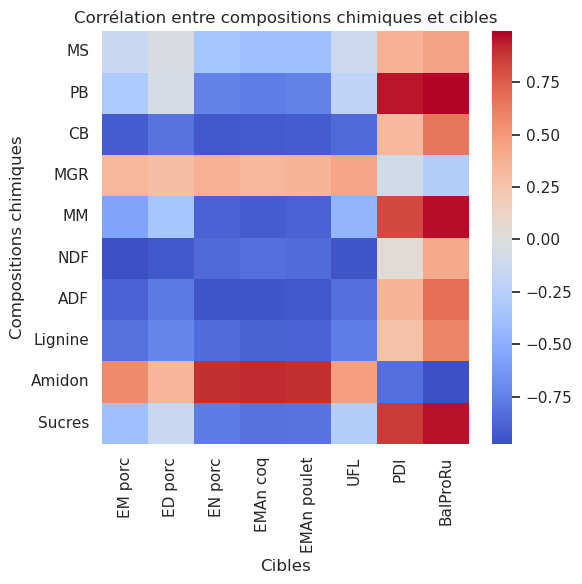

In [6]:
# Corrélations entre compositions chimiques et énergies
corr_subset = data[vars_expl + vars_cibles].corr().loc[vars_expl, vars_cibles]
axes_compo = [noms_simplifies.get(col, col) for col in corr_subset.index]
axes_energie = [noms_simplifies.get(col, col) for col in corr_subset.columns]
plt.figure(figsize=(6,6))
sns.heatmap(corr_subset, annot=False, fmt=".2f", cmap="coolwarm", center=0, xticklabels=axes_energie, yticklabels=axes_compo)
plt.title("Corrélation entre compositions chimiques et cibles")
plt.xlabel("Cibles")
plt.ylabel("Compositions chimiques")
plt.tight_layout()
plt.show()

### Matrice de corrélations Globale

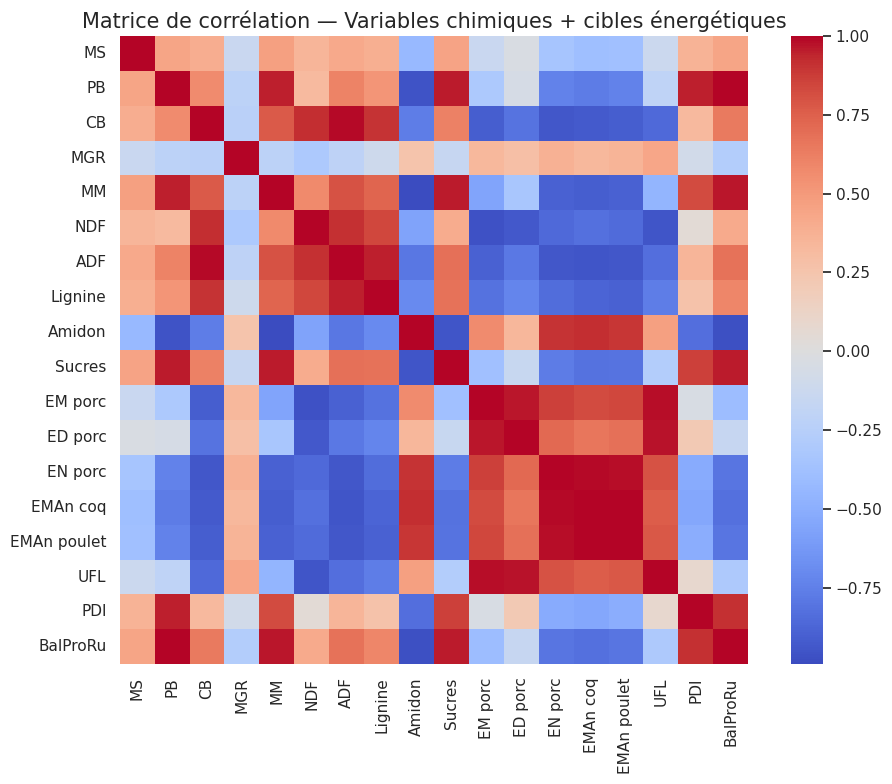

In [7]:
variables_filtrees = data[vars_expl]
correlations_filtrees = variables_filtrees.join(data[vars_cibles]).corr()
axes_labels = [noms_simplifies.get(col, col) for col in correlations_filtrees.columns]
plt.figure(figsize=(10,8))
sns.heatmap(correlations_filtrees, annot=False, fmt=".2f", cmap="coolwarm", center=0, square=True, xticklabels=axes_labels, yticklabels=axes_labels)
plt.title("Matrice de corrélation — Variables chimiques + cibles énergétiques", fontsize=15)
plt.tight_layout()
plt.show()

## Graphe des corrélations pour chaque cible

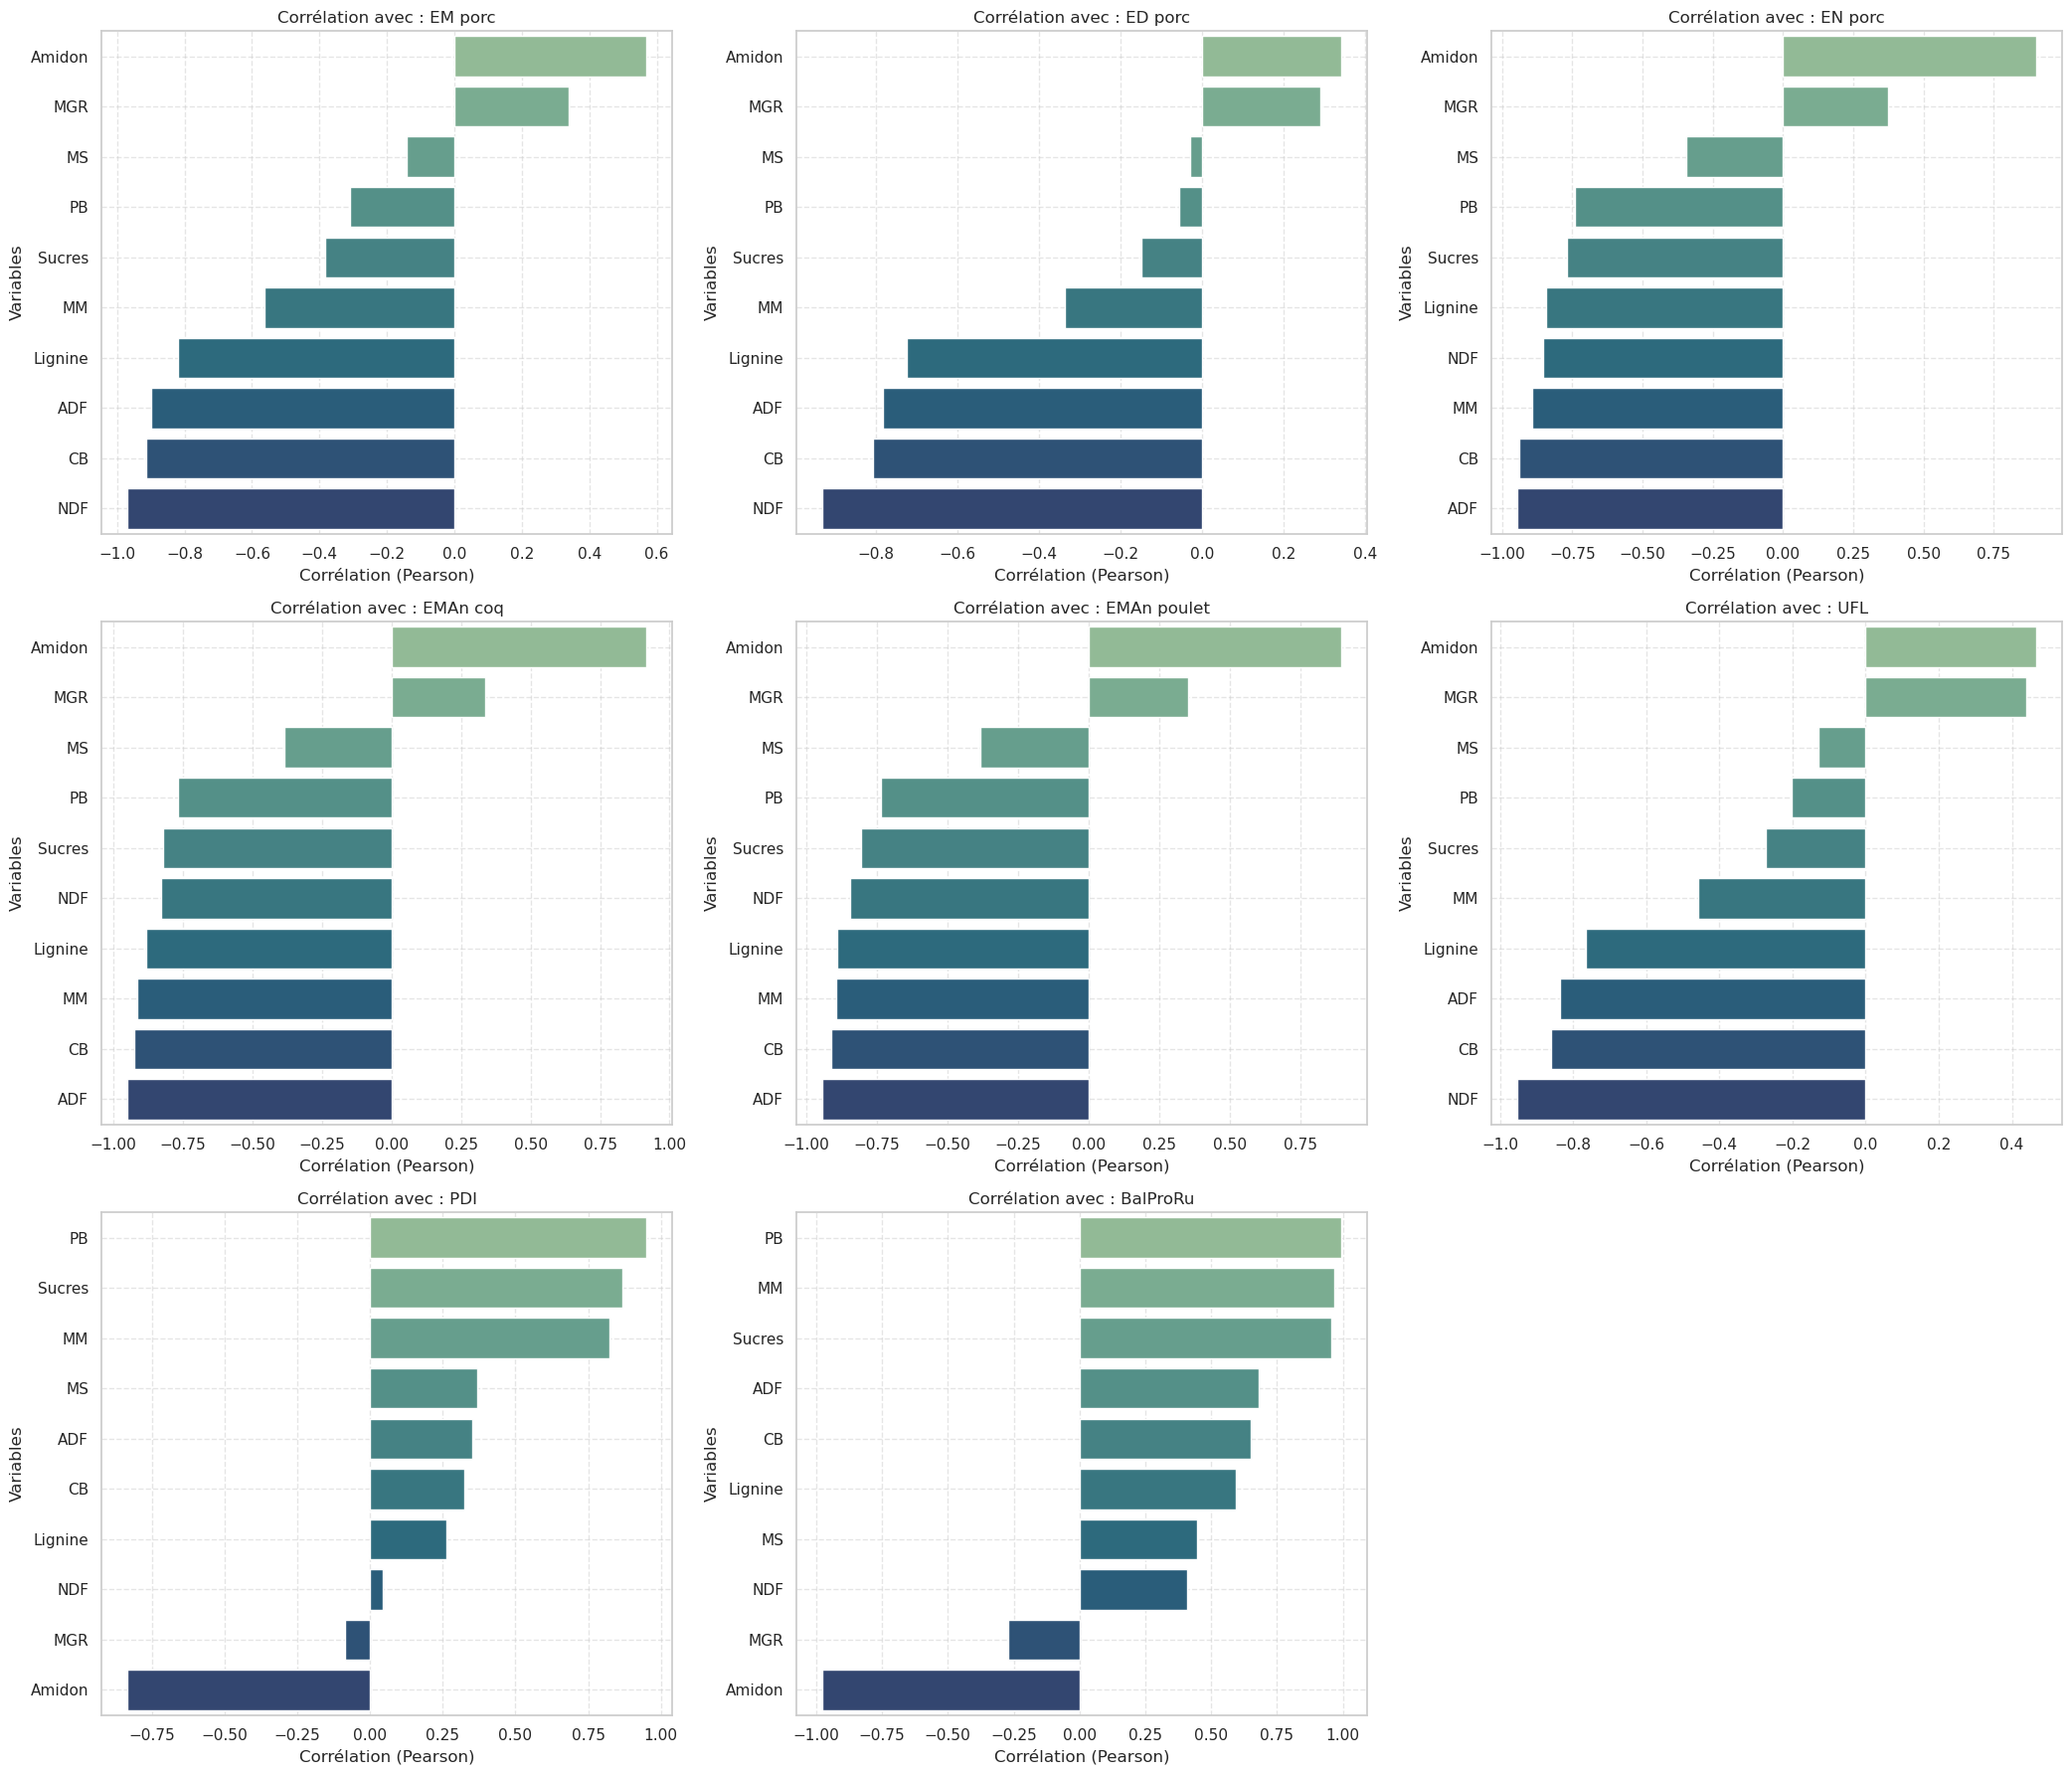

In [60]:
# Graphe des corrélations avec chaque cible
import math
n_cibles = len(vars_cibles)
ncols = 3
nrows = math.ceil(n_cibles / ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*7, nrows*6))
axs = axs.flatten()
for idx, cible in enumerate(vars_cibles):
    if cible in data.columns:
        corr_em = data[vars_expl + [cible]].corr()[cible].drop(cible).sort_values(ascending=False)
        labels_simplifies = [noms_simplifies.get(var, var) for var in corr_em.index]
        ax = axs[idx]
        sns.barplot(x=corr_em.values, y=labels_simplifies, hue=labels_simplifies, palette='crest', ax=ax, legend=False)
        ax.set_title(f"Corrélation avec : {noms_simplifies.get(cible, cible)}")
        ax.set_xlabel("Corrélation (Pearson)")
        ax.set_ylabel("Variables")
        ax.grid(True, linestyle='--', alpha=0.5)
for j in range(idx+1, len(axs)):
    axs[j].set_visible(False)
plt.tight_layout()
plt.show()

## Matrices de corrélations par produit

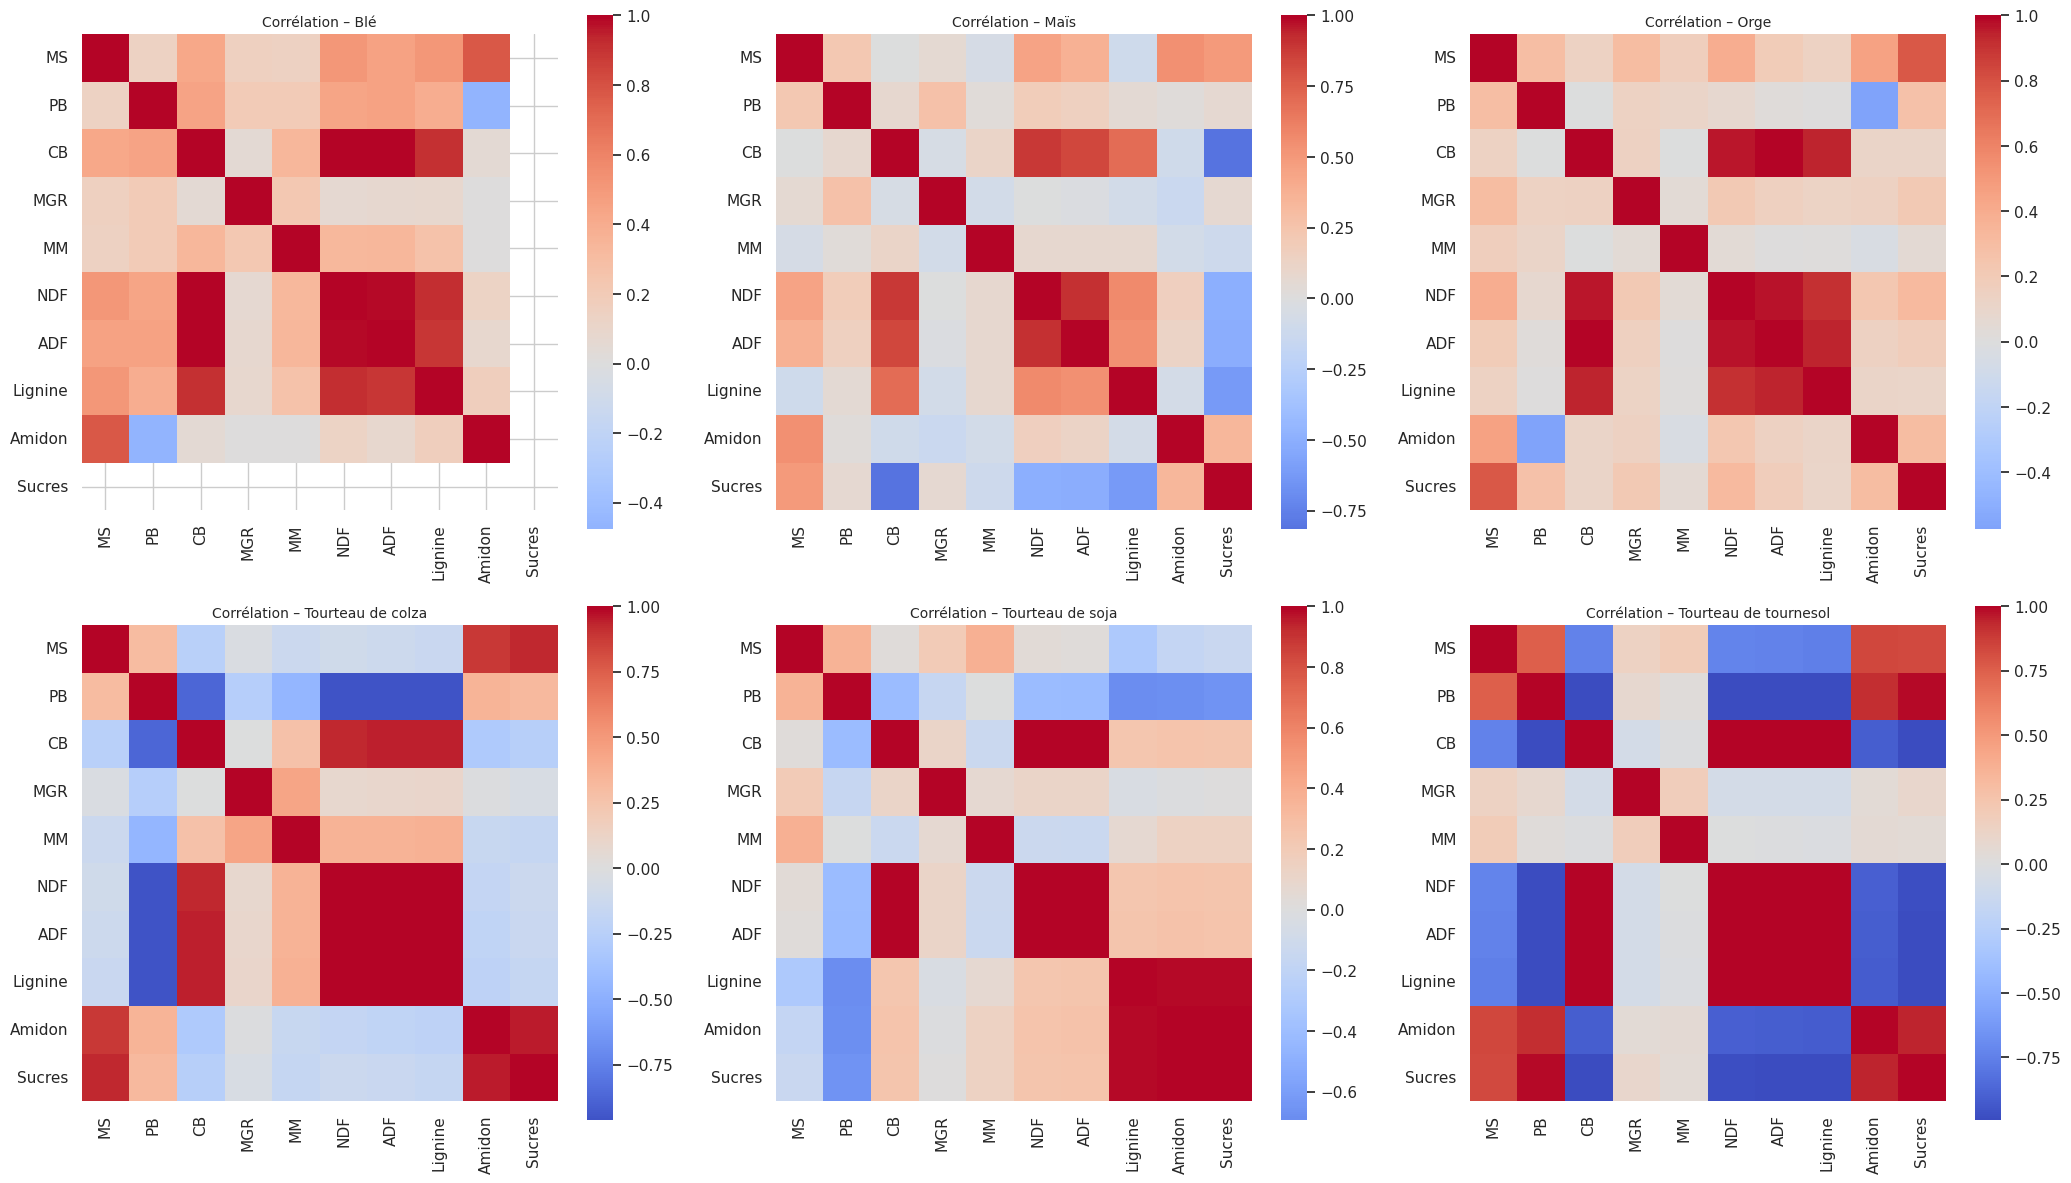

In [9]:
# Corrélations par produit
import math
noms_uniques = data["Nom"].unique()
n_plots = len(noms_uniques)
ncols = 3
nrows = math.ceil(n_plots / ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*7, nrows*6))
axs = axs.flatten()
for idx, nom in enumerate(noms_uniques):
    sous_data = data[data["Nom"] == nom]
    sous_num = sous_data[vars_expl].apply(pd.to_numeric, errors='coerce').dropna()
    if sous_num.shape[1] < 2 or sous_num.shape[0] == 0:
        axs[idx].set_visible(False)
        continue
    corr = sous_num.corr()
    axes_labels = [noms_simplifies.get(col, col) for col in corr.columns]
    ax = axs[idx]
    sns.heatmap(corr, cmap="coolwarm", center=0, square=True, ax=ax, annot=False, fmt=".2f", xticklabels=axes_labels, yticklabels=axes_labels)
    ax.set_title(f"Corrélation – {nom}", fontsize=10)
for j in range(idx+1, len(axs)):
    axs[j].set_visible(False)
plt.tight_layout()
plt.show()

## Analyse en Composantes Principales (ACP) globale sur les compositions chimiques

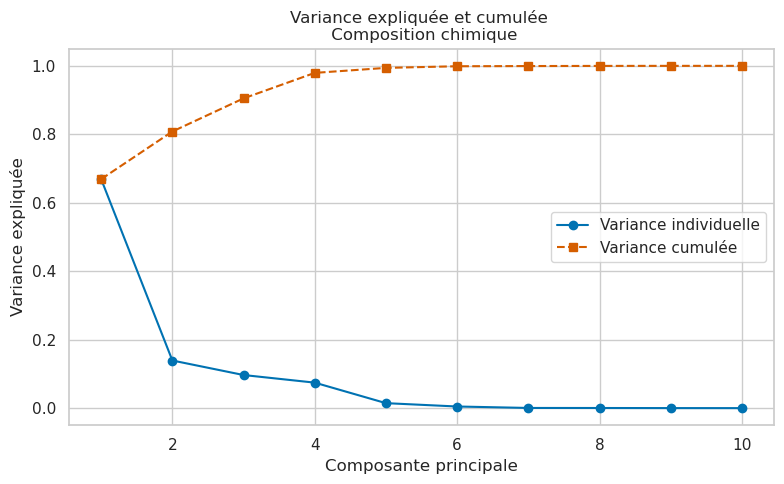

In [11]:
# ACP globale sur les variables de composition chimique
normaliseur = StandardScaler()
X_normalise = normaliseur.fit_transform(data[vars_expl])
acp = PCA()
X_acp = acp.fit_transform(X_normalise)
acp_df = pd.DataFrame(X_acp, columns=[f"CP{i+1}" for i in range(X_acp.shape[1])])
acp_df["Classe"] = data["Classe"]
acp_df["Nom"] = data["Nom"]
plt.figure(figsize=(8,5))
plt.plot(range(1, len(acp.explained_variance_ratio_)+1), acp.explained_variance_ratio_, marker='o', label="Variance individuelle", color='#0072B2')
plt.plot(range(1, len(acp.explained_variance_ratio_)+1), np.cumsum(acp.explained_variance_ratio_), marker='s', linestyle='--', label="Variance cumulée", color='#D55E00')
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.title("Variance expliquée et cumulée \n Composition chimique")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

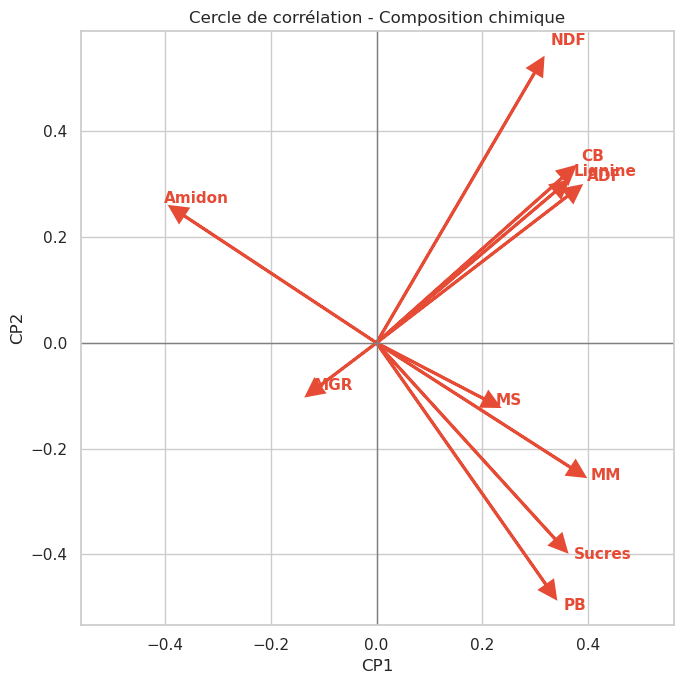

In [12]:
# Cercle de corrélation (CP1/CP2)
composantes = acp.components_[0:2]
plt.figure(figsize=(7,7))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
cercle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--', lw=1.5)
plt.gca().add_artist(cercle)
for i, var in enumerate(vars_expl):
    plt.arrow(0, 0, composantes[0, i], composantes[1, i], head_width=0.03, head_length=0.03, linewidth=2, color="#E64B35")
    plt.text(composantes[0, i]*1.1, composantes[1, i]*1.1, noms_simplifies.get(var, var), fontsize=11, color="#E64B35", weight='bold')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.title("Cercle de corrélation - Composition chimique")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [17]:
# graphique 3D ACP 
noms_unique = acp_df["Nom"].unique()
base_colors = plt.get_cmap("tab20")(np.linspace(0, 1, len(noms_unique)))
couleur_map = {nom: matplotlib.colors.rgb2hex(base_colors[i]) for i, nom in enumerate(noms_unique)}
fig = go.Figure()
for nom in couleur_map:
    masque = acp_df["Nom"] == nom
    fig.add_trace(go.Scatter3d(
        x=acp_df.loc[masque, "CP1"],
        y=acp_df.loc[masque, "CP2"],
        z=acp_df.loc[masque, "CP3"],
        mode="markers",
        name=nom,
        marker=dict(
            size=5,
            color=couleur_map[nom],
            opacity=0.8
        ),
        hovertext=acp_df.loc[masque, "Nom"] + " (" + acp_df.loc[masque, "Classe"] + ")"
    ))
fig.update_layout(
    title="ACP 3D — Composition chimique",
    scene=dict(
        xaxis_title=f"CP1 ({acp.explained_variance_ratio_[0]*100:.1f}%)",
        yaxis_title=f"CP2 ({acp.explained_variance_ratio_[1]*100:.1f}%)",
        zaxis_title=f"CP3 ({acp.explained_variance_ratio_[2]*100:.1f}%)"
    ),
    legend_title="Nom des produits",
    width=900,
    height=700
)
fig.show()

## Analyse en Composantes Principales (ACP) par produit sur les compositions chimiques

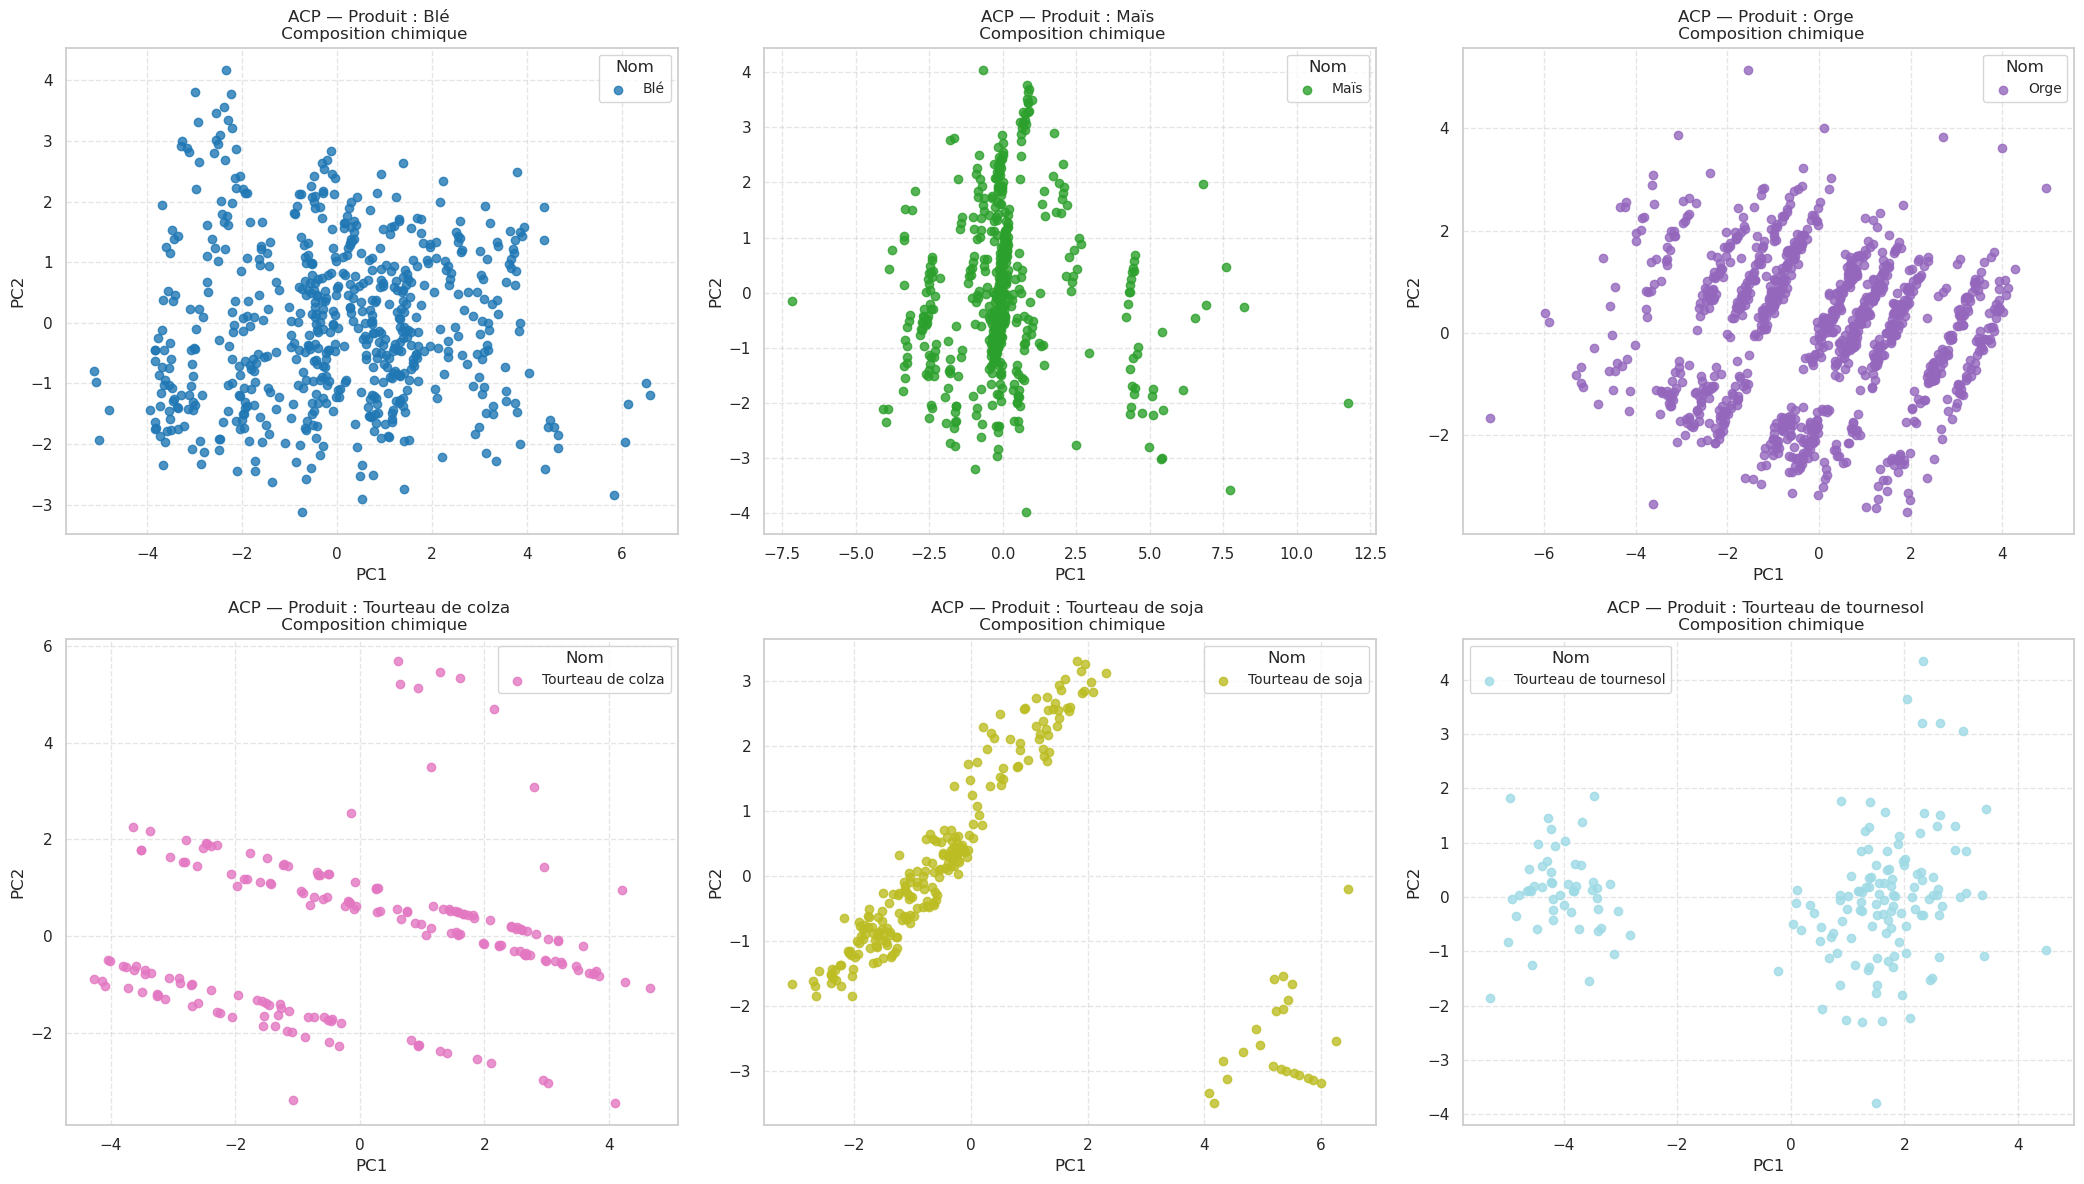

In [20]:
# ACP par produit (Nom)
noms = data['Nom'].unique()
n_plots = len(noms)
ncols = 3
nrows = math.ceil(n_plots / ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*7, nrows*6))
axs = axs.flatten()
import matplotlib
palette = matplotlib.colormaps['tab20'].resampled(len(noms))
couleur_map = {nom: matplotlib.colors.rgb2hex(palette(i)) for i, nom in enumerate(noms)}
for idx, nom in enumerate(noms):
    sous_data = data[data['Nom'] == nom]
    X = sous_data[vars_expl].apply(pd.to_numeric, errors='coerce').dropna()
    if X.shape[0] == 0:
        axs[idx].set_visible(False)
        continue
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    ax = axs[idx]
    ax.scatter(pca_df['PC1'], pca_df['PC2'], label=nom, alpha=0.8, color=couleur_map[nom])
    ax.set_title(f"ACP — Produit : {nom} \n Composition chimique")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(title="Nom", fontsize='small')
for j in range(idx+1, len(axs)):
    axs[j].set_visible(False)
plt.tight_layout()
plt.show()

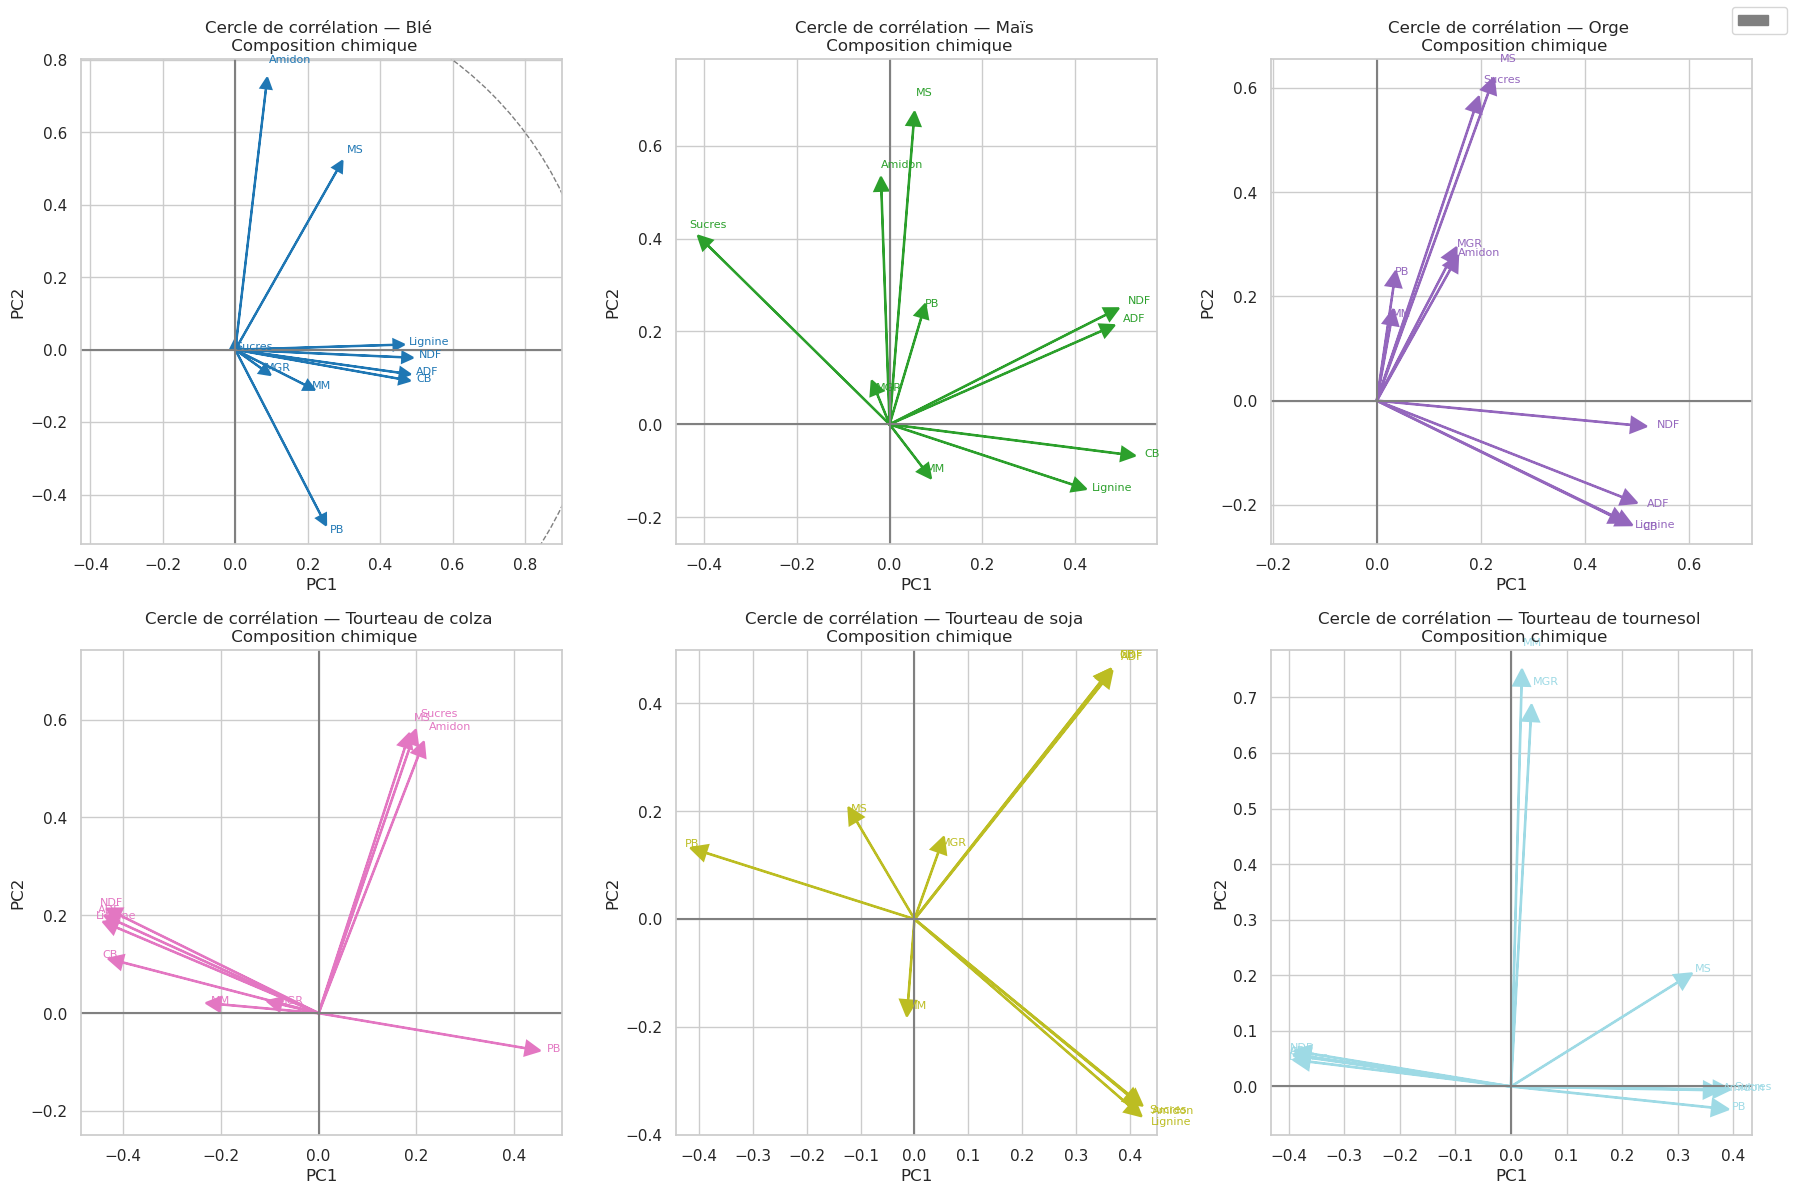

In [24]:
# Cercle des corrélations pour chaque produit (Nom)
n_plots = len(noms)
ncols = 3
nrows = math.ceil(n_plots / ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6))
axs = axs.flatten()
import matplotlib
palette = matplotlib.colormaps['tab20'].resampled(len(noms))
couleur_map = {nom: matplotlib.colors.rgb2hex(palette(i)) for i, nom in enumerate(noms)}
for idx, nom in enumerate(noms):
    sous_data = data[data['Nom'] == nom]
    X = sous_data[vars_expl].apply(pd.to_numeric, errors='coerce').dropna()
    if X.shape[0] == 0:
        axs[idx].set_visible(False)
        continue
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    ax = axs[idx]
    ax.axhline(0, color='grey')
    ax.axvline(0, color='grey')
    cercle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
    ax.add_artist(cercle)
    for i, var in enumerate(vars_expl):
        if i < pca.components_.shape[1]:
            ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.03, head_length=0.03, linewidth=1.5, color=couleur_map[nom])
            ax.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, noms_simplifies.get(var, var), fontsize=8, color=couleur_map[nom])
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title(f"Cercle de corrélation — {nom} \n Composition chimique")
    ax.axis("equal")
for j in range(idx+1, len(axs)):
    axs[j].set_visible(False)
fig.legend(handles=[Patch(facecolor='grey', edgecolor='grey')])
plt.tight_layout()
plt.show()